<a href="https://colab.research.google.com/github/kt3472/paper_etf_ml/blob/master/ETF_prediction_NN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy import interp

from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras import optimizers
from keras import initializers
import warnings
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
%matplotlib inline 

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import os
TRAIN_ABLE_FALSE=True
if TRAIN_ABLE_FALSE:
    os.environ['CUDA_VISIBLE_DEVICES'] = "1"

In [0]:
df = pd.read_excel("/content/gdrive/My Drive/etf_data_final.xlsx")
r_df = pd.read_excel("/content/gdrive/My Drive/random_data_final.xlsx")

In [0]:
df.head()

,Unnamed: 0,index,date,SPY_p,IWM_p,EEM_p,TLT_p,LQD_p,TIP_p,IYR_p,GLD_p,FXE_p,SPY_v,IWM_v,EEM_v,TLT_v,LQD_v,TIP_v,IYR_v,GLD_v,FXE_v,month,week,SPY_p_1,SPY_p_3,SPY_p_5,SPY_p_10,SPY_p_20,SPY_p_40,SPY_p_60,SPY_p_120,SPY_p_250,IWM_p_1,IWM_p_3,IWM_p_5,IWM_p_10,IWM_p_20,IWM_p_40,IWM_p_60,IWM_p_120,...,IYR_20_y,IYR_40_y,IYR_60_y,IYR_120_y,IYR_250_y,GLD_1_y,GLD_3_y,GLD_5_y,GLD_10_y,GLD_20_y,GLD_40_y,GLD_60_y,GLD_120_y,GLD_250_y,FXE_1_y,FXE_3_y,FXE_5_y,FXE_10_y,FXE_20_y,FXE_40_y,FXE_60_y,FXE_120_y,FXE_250_y,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,250,2011-12-29,107.496193,66.057526,31.844088,98.016830,85.749313,102.159256,42.352482,150.339996,129.149994,123507200,27090500,32240500,4305000,971600,605700,2951900,19812200,855300,12,3,0.010334,-0.002136,0.015704,0.042549,0.015440,0.040327,0.129784,-0.033292,0.013506,0.010080,-0.005366,0.004742,0.048869,0.010602,0.043727,0.150049,-0.102249,...,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,251,2011-12-30,106.967743,65.701195,31.869280,98.333130,86.112694,102.124252,42.144760,151.990005,128.919998,95599000,31979800,33432400,5948800,807100,758400,4270000,10852700,886900,12,4,-0.004916,-0.007827,0.001836,0.033687,0.010610,0.018598,0.103792,-0.033871,0.009080,-0.005394,-0.013642,-0.007001,0.033609,0.012428,0.013120,0.128346,-0.102027,...,1,1,1,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2,252,2012-01-03,108.672401,66.788040,32.843678,96.857132,86.044540,102.089241,42.404408,155.919998,130.020004,193697900,60504700,72557500,9076900,2509400,1242000,9054000,13385800,1049400,1,1,0.015936,0.021389,0.008782,0.048606,0.027620,0.016306,0.101456,-0.021750,0.019859,0.016542,0.021250,0.005633,0.042564,0.024975,0.004878,0.122069,-0.095253,...,1,1,1,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,253,2012-01-04,108.842880,66.422791,32.658875,95.705551,86.112694,102.185547,41.929615,156.710007,128.960007,127186500,34648500,46225600,8417100,1641400,711100,12839200,11549700,982300,1,2,0.001569,0.012528,0.009566,0.061601,0.018142,0.024146,0.110620,-0.013406,0.023464,-0.005469,0.005529,-0.002808,0.055115,0.002190,0.004339,0.143873,-0.085653,...,1,1,1,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4,254,2012-01-05,109.132668,66.796974,32.516071,95.535225,85.741760,102.378059,42.233788,157.779999,127.449997,173895000,57274600,54383000,6465800,1454800,2192900,6432700,11621600,1246800,1,3,0.002662,0.020239,0.025715,0.033164,0.020529,0.020529,0.077538,-0.016488,0.028207,0.005633,0.016678,0.021387,0.020116,0.006892,0.012032,0.102030,-0.086609,...,1,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
r_df.head()

,Unnamed: 0,index,date,SPY_p,IWM_p,EEM_p,TLT_p,LQD_p,TIP_p,IYR_p,GLD_p,FXE_p,SPY_v,IWM_v,EEM_v,TLT_v,LQD_v,TIP_v,IYR_v,GLD_v,FXE_v,month,week,SPY_p_1,SPY_p_3,SPY_p_5,SPY_p_10,SPY_p_20,SPY_p_40,SPY_p_60,SPY_p_120,SPY_p_250,IWM_p_1,IWM_p_3,IWM_p_5,IWM_p_10,IWM_p_20,IWM_p_40,IWM_p_60,IWM_p_120,...,IYR_20_y,IYR_40_y,IYR_60_y,IYR_120_y,IYR_250_y,GLD_1_y,GLD_3_y,GLD_5_y,GLD_10_y,GLD_20_y,GLD_40_y,GLD_60_y,GLD_120_y,GLD_250_y,FXE_1_y,FXE_3_y,FXE_5_y,FXE_10_y,FXE_20_y,FXE_40_y,FXE_60_y,FXE_120_y,FXE_250_y,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,250,2011-12-29,107.496193,66.057526,31.844088,98.016830,85.749313,102.159256,42.352482,150.339996,129.149994,123507200,27090500,32240500,4305000,971600,605700,2951900,19812200,855300,12,3,0.220120,0.198272,0.178845,0.929566,0.158834,0.600027,0.393048,0.194953,0.013424,0.076606,0.376058,0.097217,0.772290,0.401515,0.538188,0.594140,0.736147,...,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,251,2011-12-30,106.967743,65.701195,31.869280,98.333130,86.112694,102.124252,42.144760,151.990005,128.919998,95599000,31979800,33432400,5948800,807100,758400,4270000,10852700,886900,12,4,0.430087,0.453289,0.062598,0.970809,0.475921,0.362757,0.197541,0.728310,0.652563,0.768829,0.185053,0.744626,0.229590,0.144509,0.697803,0.876331,0.988251,...,1,1,1,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2,252,2012-01-03,108.672401,66.788040,32.843678,96.857132,86.044540,102.089241,42.404408,155.919998,130.020004,193697900,60504700,72557500,9076900,2509400,1242000,9054000,13385800,1049400,1,1,0.941650,0.067684,0.778460,0.084828,0.880641,0.132224,0.452897,0.039570,0.299027,0.760495,0.997264,0.442311,0.442686,0.516450,0.248333,0.211800,0.088385,...,1,1,1,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,253,2012-01-04,108.842880,66.422791,32.658875,95.705551,86.112694,102.185547,41.929615,156.710007,128.960007,127186500,34648500,46225600,8417100,1641400,711100,12839200,11549700,982300,1,2,0.274834,0.465001,0.503164,0.691786,0.371753,0.007716,0.841822,0.820147,0.075372,0.654473,0.879765,0.552919,0.586946,0.949401,0.542611,0.701108,0.734351,...,1,1,1,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4,254,2012-01-05,109.132668,66.796974,32.516071,95.535225,85.741760,102.378059,42.233788,157.779999,127.449997,173895000,57274600,54383000,6465800,1454800,2192900,6432700,11621600,1246800,1,3,0.233375,0.624350,0.234304,0.775612,0.937967,0.084271,0.844708,0.730668,0.002706,0.154947,0.587637,0.027653,0.999074,0.844092,0.926398,0.360488,0.476012,...,1,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
r_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [0]:
print(df.columns)
print(r_df.columns)

Index(['index', 'date', 'SPY_p', 'IWM_p', 'EEM_p', 'TLT_p', 'LQD_p', 'TIP_p',
       'IYR_p', 'GLD_p',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=282)
Index(['index', 'date', 'SPY_p', 'IWM_p', 'EEM_p', 'TLT_p', 'LQD_p', 'TIP_p',
       'IYR_p', 'GLD_p',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=282)


In [0]:
df_col = ['SPY', 'IWM', 'EEM', 'TLT', 'LQD', 'TIP', 'IYR',
       'GLD', 'FXE']

dummy = ['month_1', 
         'month_2', 
         'month_3', 
         'month_4', 
         'month_5', 
         'month_6', 
         'month_7', 
         'month_8', 
         'month_9',
         'month_10',
         'month_11',
         'month_12',
         'MON', 'TUE','WED', 'THU', 'FRI']

td = [1, 3, 5, 10, 20, 40, 60, 120, 250]

In [0]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
lw=2

In [0]:
df.shape

(1027, 282)

In [0]:
r_df.shape

(1027, 282)

In [0]:
df_col

['SPY', 'IWM', 'EEM', 'TLT', 'LQD', 'TIP', 'IYR', 'GLD', 'FXE']

SPY
Real Data & Random Data Processing for horizon =  1

Alpha =  0.1






Epoch 1/1





718/718 [==============================] - 0s 61us/step
Epoch 1/1
718/718 [==============================] - 0s 26us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 0s 86us/step
Epoch 1/1
718/718 [==============================] - 0s 26us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 0s 110us/step
Epoch 1/1
718/718 [==============================] - 0s 25us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 0s 156us/step
Epoch 1/1
718/718 [==============================] - 0s 29us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 0s 177us/step
Epoch 1/1
718/718 [==============================] - 0s 28us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 0s 209us/step
Epoch 1/1
718/718 [==============================] - 0s 30us/step
Alpha =  0.0001
Epoch 1/1
718/718 [================

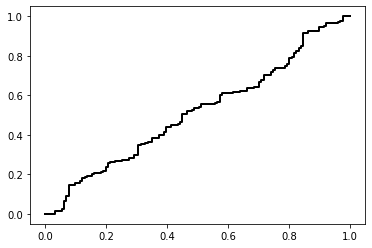

Random Data, horizon 1
AUC good =  0.4945964490951197


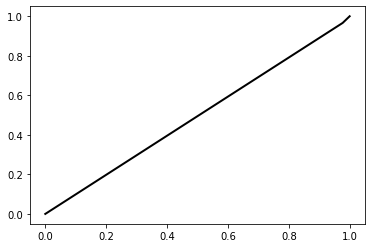

C =  10.0
Real_data_accuracy   :  0.5243
Random data_accuracy :  0.5663
Gain =  -0.042
---------------------------------------------

Real Data & Random Data Processing for horizon =  3
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 0s 345us/step
Epoch 1/1
718/718 [==============================] - 0s 29us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 0s 395us/step
Epoch 1/1
718/718 [==============================] - 0s 29us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 0s 455us/step
Epoch 1/1
718/718 [==============================] - 0s 35us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 0s 480us/step
Epoch 1/1
718/718 [==============================] - 0s 38us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 0s 478us/step
Epoch 1/1
718/718 [==============================] - 0s 33us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 0s 513us/st

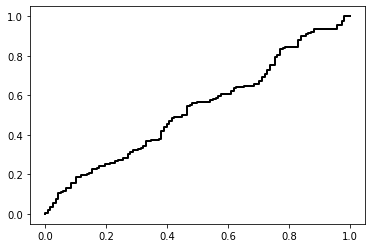

Random Data, horizon 3
AUC good =  0.5


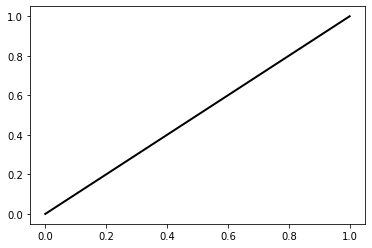

C =  0.001
Real_data_accuracy   :  0.5955
Random data_accuracy :  0.3819
Gain =  0.2136
---------------------------------------------

Real Data & Random Data Processing for horizon =  5
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 0s 657us/step
Epoch 1/1
718/718 [==============================] - 0s 36us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 0s 696us/step
Epoch 1/1
718/718 [==============================] - 0s 33us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 1s 727us/step
Epoch 1/1
718/718 [==============================] - 0s 36us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 1s 795us/step
Epoch 1/1
718/718 [==============================] - 0s 33us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 1s 843us/step
Epoch 1/1
718/718 [==============================] - 0s 35us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 1s 850us/s

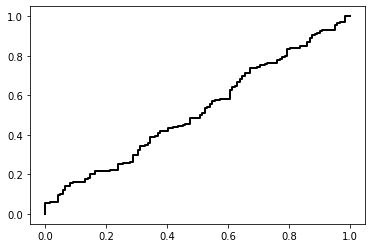

Random Data, horizon 5
AUC good =  0.5


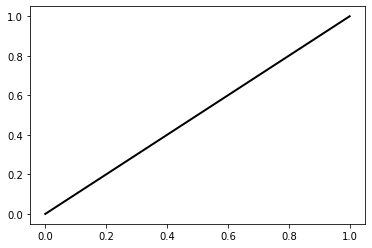

C =  0.01
Real_data_accuracy   :  0.589
Random data_accuracy :  0.3948
Gain =  0.1942
---------------------------------------------

Real Data & Random Data Processing for horizon =  10
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 1s 984us/step
Epoch 1/1
718/718 [==============================] - 0s 37us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 1s 1ms/step
Epoch 1/1
718/718 [==============================] - 0s 36us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 1s 1ms/step
Epoch 1/1
718/718 [==============================] - 0s 34us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 1s 1ms/step
Epoch 1/1
718/718 [==============================] - 0s 34us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 1s 1ms/step
Epoch 1/1
718/718 [==============================] - 0s 36us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 1s 1ms/step
Epoch 1

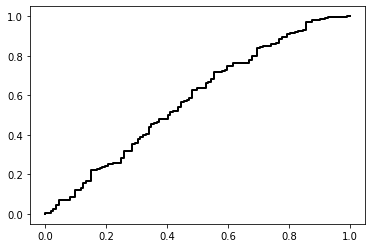

Random Data, horizon 10
AUC good =  0.4927257070340827


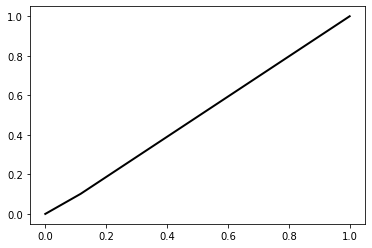

C =  1.0
Real_data_accuracy   :  0.5437
Random data_accuracy :  0.3851
Gain =  0.1586
---------------------------------------------

Real Data & Random Data Processing for horizon =  20
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 1s 1ms/step
Epoch 1/1
718/718 [==============================] - 0s 34us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 1s 1ms/step
Epoch 1/1
718/718 [==============================] - 0s 36us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 1s 2ms/step
Epoch 1/1
718/718 [==============================] - 0s 35us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 1s 2ms/step
Epoch 1/1
718/718 [==============================] - 0s 41us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 1s 2ms/step
Epoch 1/1
718/718 [==============================] - 0s 37us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 1s 2ms/step
Epoch 1/1

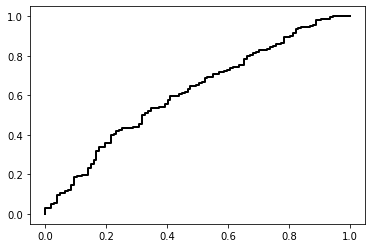

Random Data, horizon 20
AUC good =  0.5


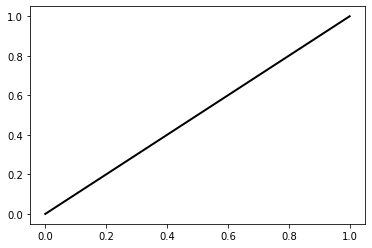

C =  0.1
Real_data_accuracy   :  0.6731
Random data_accuracy :  0.3463
Gain =  0.3268
---------------------------------------------

Real Data & Random Data Processing for horizon =  40
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 1s 2ms/step
Epoch 1/1
718/718 [==============================] - 0s 36us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 1s 2ms/step
Epoch 1/1
718/718 [==============================] - 0s 40us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 1s 2ms/step
Epoch 1/1
718/718 [==============================] - 0s 41us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 1s 2ms/step
Epoch 1/1
718/718 [==============================] - 0s 42us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 1s 2ms/step
Epoch 1/1
718/718 [==============================] - 0s 46us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 2s 2ms/step
Epoch 1/1

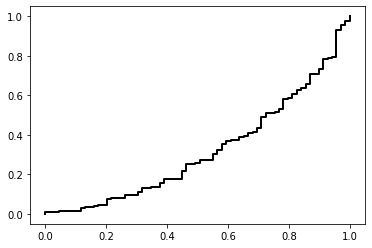

Random Data, horizon 40
AUC good =  0.4855072463768116


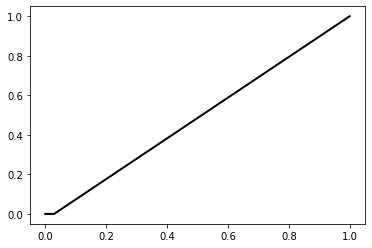

C =  0.0001
Real_data_accuracy   :  0.7767
Random data_accuracy :  0.2168
Gain =  0.5599
---------------------------------------------

Real Data & Random Data Processing for horizon =  60
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 2s 2ms/step
Epoch 1/1
718/718 [==============================] - 0s 36us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 2s 2ms/step
Epoch 1/1
718/718 [==============================] - 0s 53us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 2s 2ms/step
Epoch 1/1
718/718 [==============================] - 0s 39us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 2s 2ms/step
Epoch 1/1
718/718 [==============================] - 0s 40us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 1/1
718/718 [==============================] - 0s 42us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 

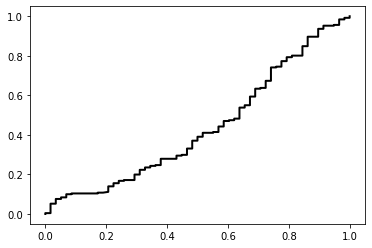

Random Data, horizon 60
AUC good =  0.5


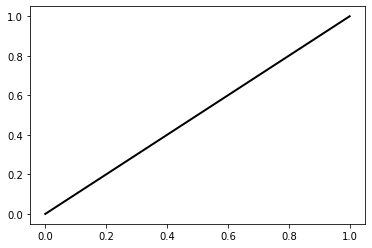

C =  100.0
Real_data_accuracy   :  0.5922
Random data_accuracy :  0.1877
Gain =  0.4045
---------------------------------------------

Real Data & Random Data Processing for horizon =  120
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 1/1
718/718 [==============================] - 0s 51us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 1/1
718/718 [==============================] - 0s 46us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 1/1
718/718 [==============================] - 0s 47us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 1/1
718/718 [==============================] - 0s 64us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 1/1
718/718 [==============================] - 0s 45us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 

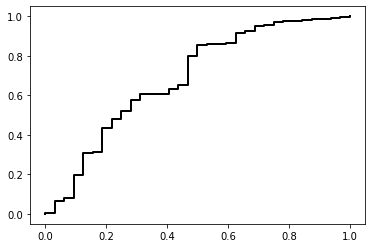

Random Data, horizon 120
AUC good =  0.37116425992779783


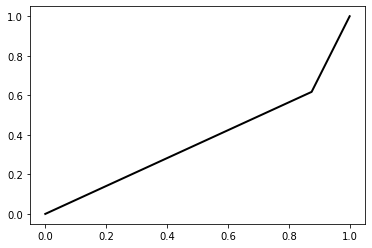

C =  10.0
Real_data_accuracy   :  0.877
Random data_accuracy :  0.5663
Gain =  0.3107
---------------------------------------------

Real Data & Random Data Processing for horizon =  250
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 1/1
718/718 [==============================] - 0s 48us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 1/1
718/718 [==============================] - 0s 57us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 1/1
718/718 [==============================] - 0s 48us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 1/1
718/718 [==============================] - 0s 49us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 1/1
718/718 [==============================] - 0s 45us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 1/

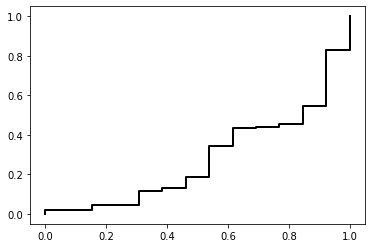

Random Data, horizon 250
AUC good =  0.25


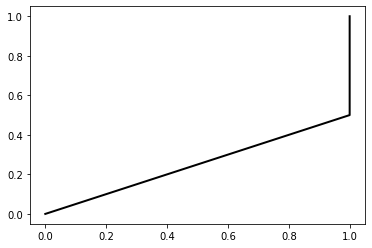

C =  1000.0
Real_data_accuracy   :  0.7994
Random data_accuracy :  0.479
Gain =  0.3204
---------------------------------------------

IWM
Real Data & Random Data Processing for horizon =  1
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 2s 3ms/step
Epoch 1/1
718/718 [==============================] - 0s 62us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoch 1/1
718/718 [==============================] - 0s 45us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoch 1/1
718/718 [==============================] - 0s 50us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoch 1/1
718/718 [==============================] - 0s 56us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoch 1/1
718/718 [==============================] - 0s 54us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoc

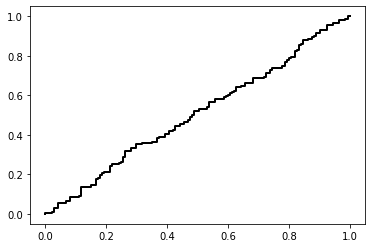

Random Data, horizon 1
AUC good =  0.5


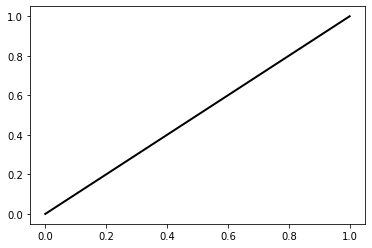

C =  0.0001
Real_data_accuracy   :  0.5081
Random data_accuracy :  0.4693
Gain =  0.0388
---------------------------------------------

Real Data & Random Data Processing for horizon =  3
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoch 1/1
718/718 [==============================] - 0s 49us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoch 1/1
718/718 [==============================] - 0s 53us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoch 1/1
718/718 [==============================] - 0s 59us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoch 1/1
718/718 [==============================] - 0s 53us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoch 1/1
718/718 [==============================] - 0s 57us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoch 1

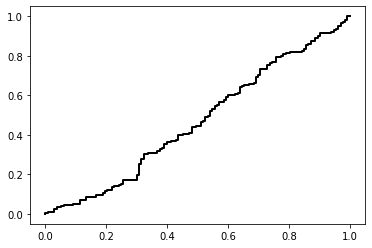

Random Data, horizon 3
AUC good =  0.4903024606971975


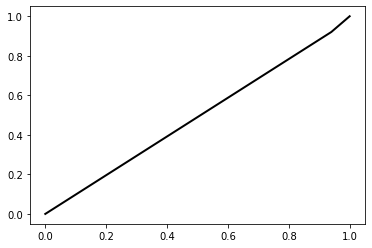

C =  1000.0
Real_data_accuracy   :  0.5631
Random data_accuracy :  0.5502
Gain =  0.0129
---------------------------------------------

Real Data & Random Data Processing for horizon =  5
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoch 1/1
718/718 [==============================] - 0s 54us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 3s 5ms/step
Epoch 1/1
718/718 [==============================] - 0s 64us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoch 1/1
718/718 [==============================] - 0s 61us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 3s 4ms/step
Epoch 1/1
718/718 [==============================] - 0s 65us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 3s 5ms/step
Epoch 1/1
718/718 [==============================] - 0s 57us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 3s 5ms/step
Epoch 1

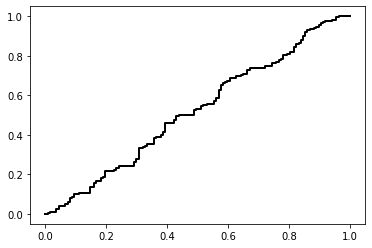

Random Data, horizon 5
AUC good =  0.5


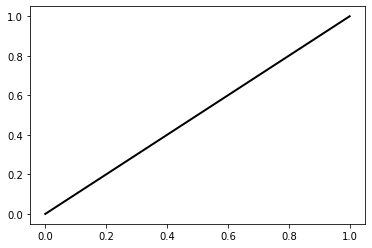

C =  1000.0
Real_data_accuracy   :  0.5502
Random data_accuracy :  0.4434
Gain =  0.1068
---------------------------------------------

Real Data & Random Data Processing for horizon =  10
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 3s 5ms/step
Epoch 1/1
718/718 [==============================] - 0s 57us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 3s 5ms/step
Epoch 1/1
718/718 [==============================] - 0s 71us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 3s 5ms/step
Epoch 1/1
718/718 [==============================] - 0s 73us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 3s 5ms/step
Epoch 1/1
718/718 [==============================] - 0s 58us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 4s 5ms/step
Epoch 1/1
718/718 [==============================] - 0s 57us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 4s 5ms/step
Epoch 

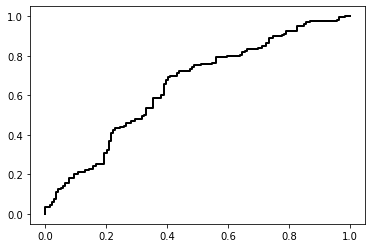

Random Data, horizon 10
AUC good =  0.3887008040626323


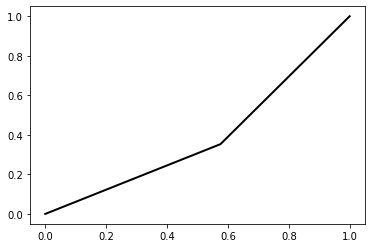

C =  10.0
Real_data_accuracy   :  0.6084
Random data_accuracy :  0.3851
Gain =  0.2233
---------------------------------------------

Real Data & Random Data Processing for horizon =  20
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 4s 5ms/step
Epoch 1/1
718/718 [==============================] - 0s 60us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 4s 5ms/step
Epoch 1/1
718/718 [==============================] - 0s 58us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 4s 5ms/step
Epoch 1/1
718/718 [==============================] - 0s 60us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 4s 5ms/step
Epoch 1/1
718/718 [==============================] - 0s 65us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 4s 5ms/step
Epoch 1/1
718/718 [==============================] - 0s 65us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 4s 5ms/step
Epoch 1/

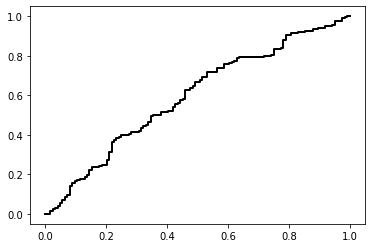

Random Data, horizon 20
AUC good =  0.5510026155187445


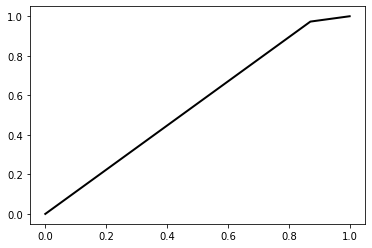

C =  100.0
Real_data_accuracy   :  0.5663
Random data_accuracy :  0.6343
Gain =  -0.068
---------------------------------------------

Real Data & Random Data Processing for horizon =  40
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 4s 5ms/step
Epoch 1/1
718/718 [==============================] - 0s 66us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 4s 6ms/step
Epoch 1/1
718/718 [==============================] - 0s 86us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 4s 6ms/step
Epoch 1/1
718/718 [==============================] - 0s 74us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 4s 6ms/step
Epoch 1/1
718/718 [==============================] - 0s 64us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 4s 6ms/step
Epoch 1/1
718/718 [==============================] - 0s 70us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 4s 6ms/step
Epoch 1

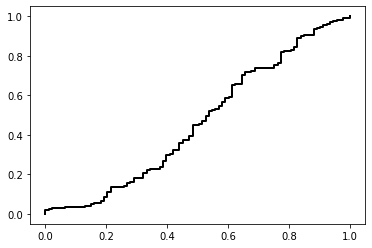

Random Data, horizon 40
AUC good =  0.5


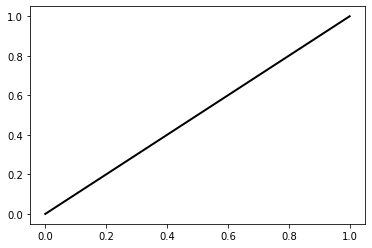

C =  0.001
Real_data_accuracy   :  0.699
Random data_accuracy :  0.301
Gain =  0.398
---------------------------------------------

Real Data & Random Data Processing for horizon =  60
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 4s 6ms/step
Epoch 1/1
718/718 [==============================] - 0s 86us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 4s 6ms/step
Epoch 1/1
718/718 [==============================] - 0s 75us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 4s 6ms/step
Epoch 1/1
718/718 [==============================] - 0s 85us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 4s 6ms/step
Epoch 1/1
718/718 [==============================] - 0s 68us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 5s 6ms/step
Epoch 1/1
718/718 [==============================] - 0s 71us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 5s 6ms/step
Epoch 1/1


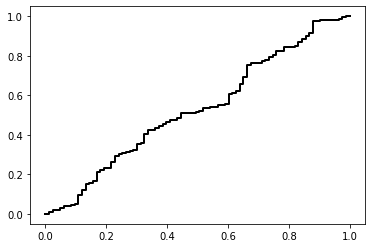

Random Data, horizon 60
AUC good =  0.5


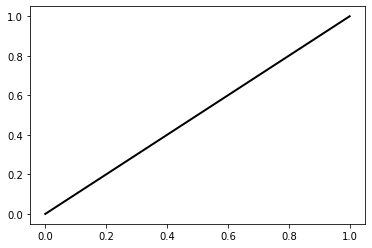

C =  10.0
Real_data_accuracy   :  0.411
Random data_accuracy :  0.7314
Gain =  -0.3204
---------------------------------------------

Real Data & Random Data Processing for horizon =  120
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 5s 7ms/step
Epoch 1/1
718/718 [==============================] - 0s 73us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 5s 7ms/step
Epoch 1/1
718/718 [==============================] - 0s 76us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 5s 7ms/step
Epoch 1/1
718/718 [==============================] - 0s 76us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 5s 7ms/step
Epoch 1/1
718/718 [==============================] - 0s 76us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 5s 7ms/step
Epoch 1/1
718/718 [==============================] - 0s 84us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 5s 7ms/step
Epoch 1

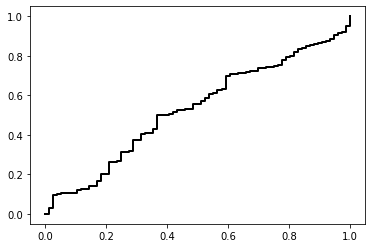

Random Data, horizon 120
AUC good =  0.5


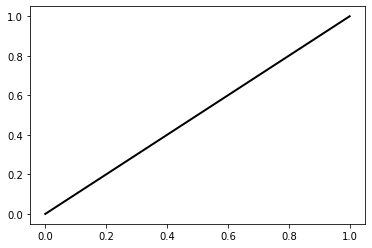

C =  1.0
Real_data_accuracy   :  0.5405
Random data_accuracy :  0.754
Gain =  -0.2135
---------------------------------------------

Real Data & Random Data Processing for horizon =  250
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 5s 7ms/step
Epoch 1/1
718/718 [==============================] - 0s 81us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 5s 7ms/step
Epoch 1/1
718/718 [==============================] - 0s 97us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 5s 7ms/step
Epoch 1/1
718/718 [==============================] - 0s 82us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 5s 7ms/step
Epoch 1/1
718/718 [==============================] - 0s 85us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 5s 8ms/step
Epoch 1/1
718/718 [==============================] - 0s 90us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 5s 8ms/step
Epoch 1/

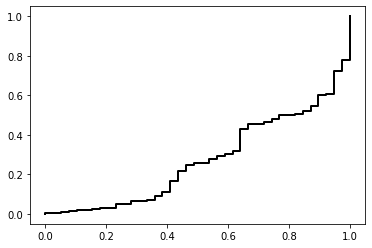

Random Data, horizon 250
AUC good =  0.485042735042735


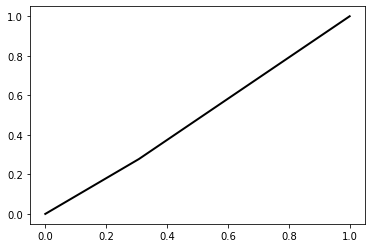

C =  10.0
Real_data_accuracy   :  0.7087
Random data_accuracy :  0.3301
Gain =  0.3786
---------------------------------------------

EEM
Real Data & Random Data Processing for horizon =  1
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 5s 8ms/step
Epoch 1/1
718/718 [==============================] - 0s 89us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 6s 8ms/step
Epoch 1/1
718/718 [==============================] - 0s 88us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 6s 8ms/step
Epoch 1/1
718/718 [==============================] - 0s 91us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 6s 8ms/step
Epoch 1/1
718/718 [==============================] - 0s 104us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 6s 8ms/step
Epoch 1/1
718/718 [==============================] - 0s 95us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 6s 8ms/step
Epoc

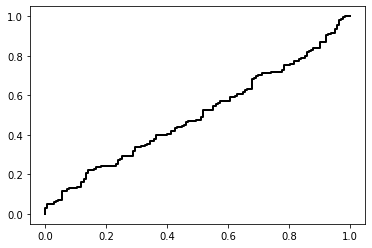

Random Data, horizon 1
AUC good =  0.5


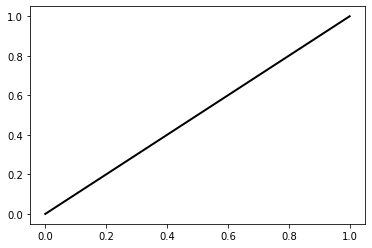

C =  0.1
Real_data_accuracy   :  0.4854
Random data_accuracy :  0.5372
Gain =  -0.0518
---------------------------------------------

Real Data & Random Data Processing for horizon =  3
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 6s 8ms/step
Epoch 1/1
718/718 [==============================] - 0s 89us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 6s 8ms/step
Epoch 1/1
718/718 [==============================] - 0s 95us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 6s 8ms/step
Epoch 1/1
718/718 [==============================] - 0s 94us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 6s 8ms/step
Epoch 1/1
718/718 [==============================] - 0s 89us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 6s 8ms/step
Epoch 1/1
718/718 [==============================] - 0s 95us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 6s 8ms/step
Epoch 1/1

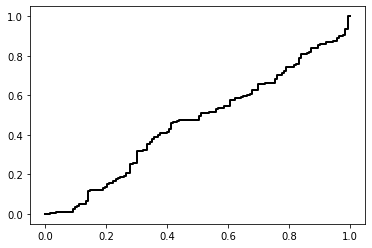

Random Data, horizon 3
AUC good =  0.5


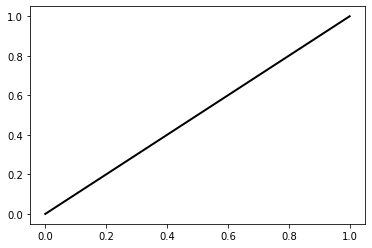

C =  10.0
Real_data_accuracy   :  0.4337
Random data_accuracy :  0.5372
Gain =  -0.1035
---------------------------------------------

Real Data & Random Data Processing for horizon =  5
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 6s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 110us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 6s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 98us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 6s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 97us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 6s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 102us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 6s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 115us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 6s 9ms/step
Epoch

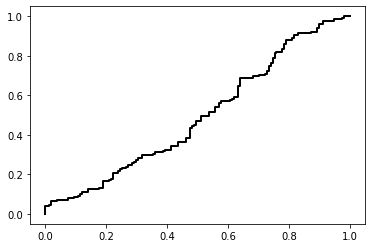

Random Data, horizon 5
AUC good =  0.4867549668874172


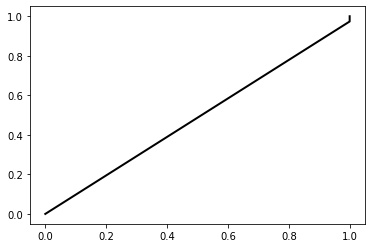

C =  10.0
Real_data_accuracy   :  0.4919
Random data_accuracy :  0.4757
Gain =  0.0162
---------------------------------------------

Real Data & Random Data Processing for horizon =  10
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 6s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 96us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 7s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 97us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 6s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 100us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 6s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 97us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 7s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 103us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 7s 9ms/step
Epoch 

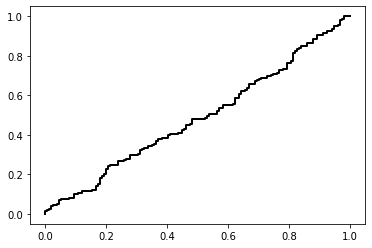

Random Data, horizon 10
AUC good =  0.4725458965546148


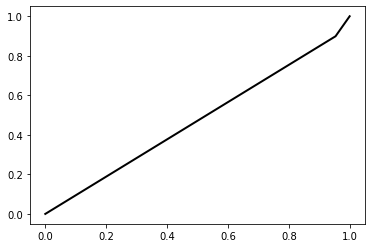

C =  0.1
Real_data_accuracy   :  0.4919
Random data_accuracy :  0.4822
Gain =  0.0097
---------------------------------------------

Real Data & Random Data Processing for horizon =  20
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 6s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 113us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 6s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 99us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 6s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 95us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 7s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 96us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 6s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 94us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 7s 9ms/step
Epoch 1/

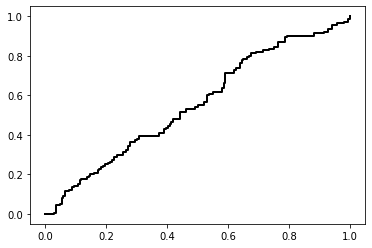

Random Data, horizon 20
AUC good =  0.5


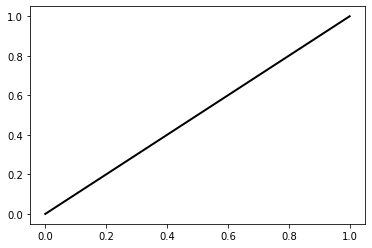

C =  1000.0
Real_data_accuracy   :  0.479
Random data_accuracy :  0.5469
Gain =  -0.0679
---------------------------------------------

Real Data & Random Data Processing for horizon =  40
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 7s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 102us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 7s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 95us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 7s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 109us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 7s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 98us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 7s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 94us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 7s 9ms/step
Epoc

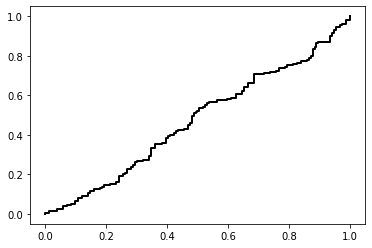

Random Data, horizon 40
AUC good =  0.5


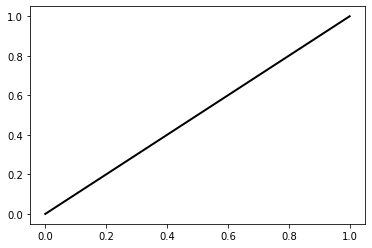

C =  0.001
Real_data_accuracy   :  0.4951
Random data_accuracy :  0.5049
Gain =  -0.0098
---------------------------------------------

Real Data & Random Data Processing for horizon =  60
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 7s 10ms/step
Epoch 1/1
718/718 [==============================] - 0s 106us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 7s 9ms/step
Epoch 1/1
718/718 [==============================] - 0s 97us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 7s 10ms/step
Epoch 1/1
718/718 [==============================] - 0s 101us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 7s 10ms/step
Epoch 1/1
718/718 [==============================] - 0s 100us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 7s 10ms/step
Epoch 1/1
718/718 [==============================] - 0s 100us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 7s 10ms/st

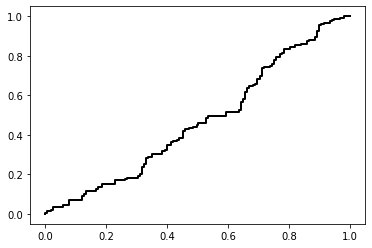

Random Data, horizon 60
AUC good =  0.5


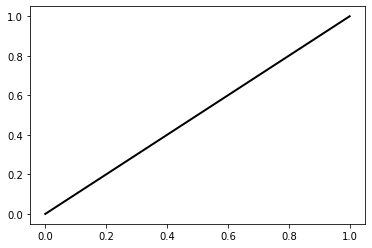

C =  0.01
Real_data_accuracy   :  0.4434
Random data_accuracy :  0.5081
Gain =  -0.0647
---------------------------------------------

Real Data & Random Data Processing for horizon =  120
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 7s 10ms/step
Epoch 1/1
718/718 [==============================] - 0s 100us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 7s 10ms/step
Epoch 1/1
718/718 [==============================] - 0s 101us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 7s 10ms/step
Epoch 1/1
718/718 [==============================] - 0s 100us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 7s 10ms/step
Epoch 1/1
718/718 [==============================] - 0s 108us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 8s 11ms/step
Epoch 1/1
718/718 [==============================] - 0s 105us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 7s 10ms/

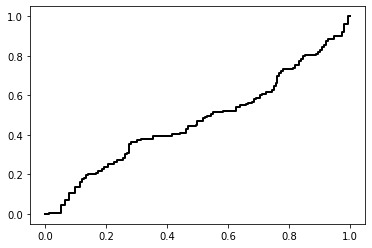

Random Data, horizon 120
AUC good =  0.4602187028657617


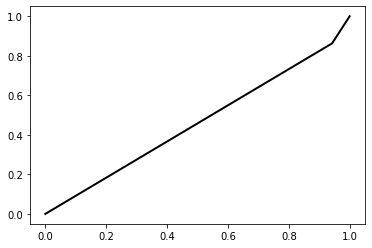

C =  0.0001
Real_data_accuracy   :  0.4693
Random data_accuracy :  0.4563
Gain =  0.013
---------------------------------------------

Real Data & Random Data Processing for horizon =  250
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 7s 10ms/step
Epoch 1/1
718/718 [==============================] - 0s 106us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 8s 10ms/step
Epoch 1/1
718/718 [==============================] - 0s 102us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 7s 10ms/step
Epoch 1/1
718/718 [==============================] - 0s 106us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 8s 10ms/step
Epoch 1/1
718/718 [==============================] - 0s 127us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 8s 11ms/step
Epoch 1/1
718/718 [==============================] - 0s 103us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 8s 11ms/

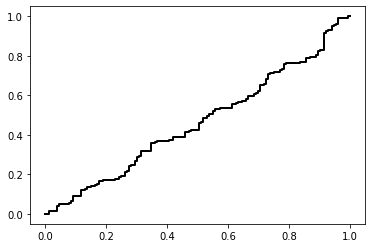

Random Data, horizon 250
AUC good =  0.506578947368421


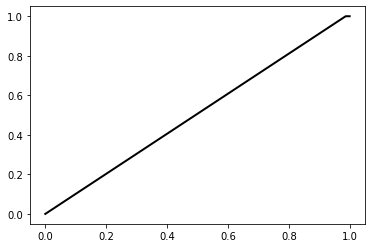

C =  1.0
Real_data_accuracy   :  0.4822
Random data_accuracy :  0.5146
Gain =  -0.0324
---------------------------------------------

TLT
Real Data & Random Data Processing for horizon =  1
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 8s 11ms/step
Epoch 1/1
718/718 [==============================] - 0s 116us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 8s 11ms/step
Epoch 1/1
718/718 [==============================] - 0s 106us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 8s 11ms/step
Epoch 1/1
718/718 [==============================] - 0s 108us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 8s 11ms/step
Epoch 1/1
718/718 [==============================] - 0s 115us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 8s 11ms/step
Epoch 1/1
718/718 [==============================] - 0s 108us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 8s 11ms

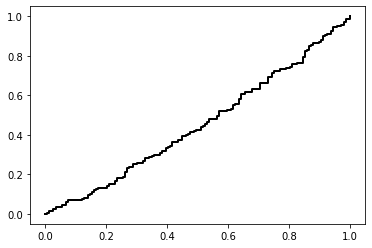

Random Data, horizon 1
AUC good =  0.5004614093959732


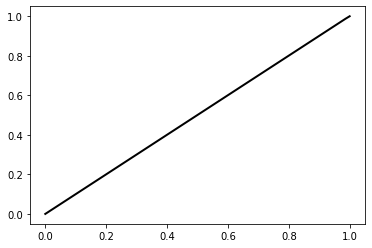

C =  1.0
Real_data_accuracy   :  0.4531
Random data_accuracy :  0.5178
Gain =  -0.0647
---------------------------------------------

Real Data & Random Data Processing for horizon =  3
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 8s 11ms/step
Epoch 1/1
718/718 [==============================] - 0s 109us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 8s 11ms/step
Epoch 1/1
718/718 [==============================] - 0s 108us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 8s 11ms/step
Epoch 1/1
718/718 [==============================] - 0s 121us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 8s 11ms/step
Epoch 1/1
718/718 [==============================] - 0s 114us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 8s 11ms/step
Epoch 1/1
718/718 [==============================] - 0s 111us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 8s 11ms/ste

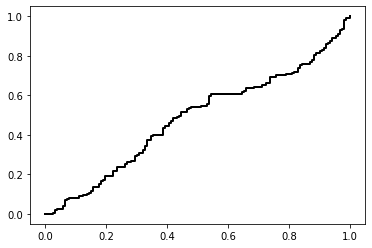

Random Data, horizon 3
AUC good =  0.4997904793831713


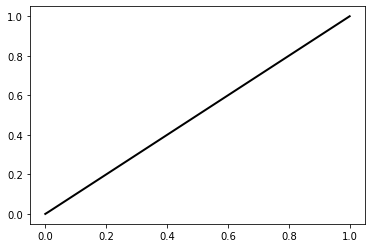

C =  0.0001
Real_data_accuracy   :  0.4693
Random data_accuracy :  0.4919
Gain =  -0.0226
---------------------------------------------

Real Data & Random Data Processing for horizon =  5
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 8s 12ms/step
Epoch 1/1
718/718 [==============================] - 0s 116us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 8s 12ms/step
Epoch 1/1
718/718 [==============================] - 0s 121us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 8s 12ms/step
Epoch 1/1
718/718 [==============================] - 0s 118us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 8s 12ms/step
Epoch 1/1
718/718 [==============================] - 0s 117us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 9s 12ms/step
Epoch 1/1
718/718 [==============================] - 0s 113us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 8s 12ms/

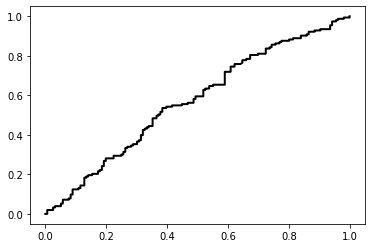

Random Data, horizon 5
AUC good =  0.5064102564102564


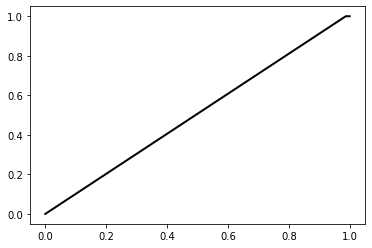

C =  100.0
Real_data_accuracy   :  0.5502
Random data_accuracy :  0.5016
Gain =  0.0486
---------------------------------------------

Real Data & Random Data Processing for horizon =  10
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 9s 12ms/step
Epoch 1/1
718/718 [==============================] - 0s 120us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 9s 12ms/step
Epoch 1/1
718/718 [==============================] - 0s 127us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 9s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 122us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 9s 12ms/step
Epoch 1/1
718/718 [==============================] - 0s 125us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 9s 12ms/step
Epoch 1/1
718/718 [==============================] - 0s 114us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 9s 12ms/s

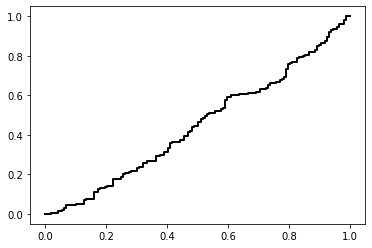

Random Data, horizon 10
AUC good =  0.5


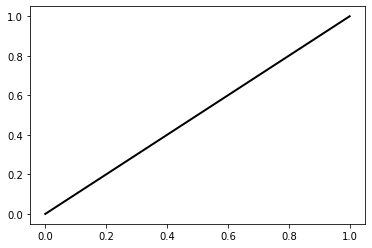

C =  100.0
Real_data_accuracy   :  0.4693
Random data_accuracy :  0.5178
Gain =  -0.0485
---------------------------------------------

Real Data & Random Data Processing for horizon =  20
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 9s 12ms/step
Epoch 1/1
718/718 [==============================] - 0s 119us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 9s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 124us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 9s 12ms/step
Epoch 1/1
718/718 [==============================] - 0s 122us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 9s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 120us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 9s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 123us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 9s 13ms/

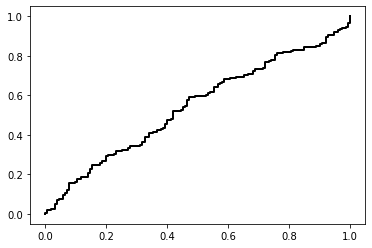

Random Data, horizon 20
AUC good =  0.5


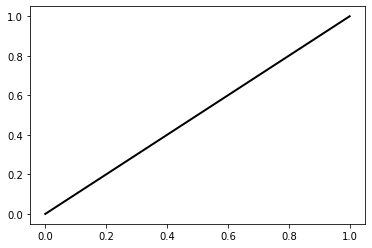

C =  100.0
Real_data_accuracy   :  0.5372
Random data_accuracy :  0.4984
Gain =  0.0388
---------------------------------------------

Real Data & Random Data Processing for horizon =  40
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 9s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 135us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 9s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 128us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 9s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 123us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 9s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 139us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 9s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 129us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 9s 13ms/s

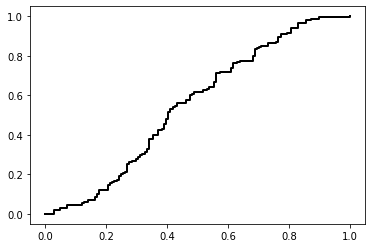

Random Data, horizon 40
AUC good =  0.5


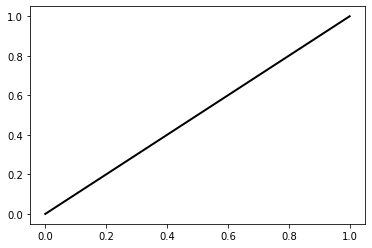

C =  0.001
Real_data_accuracy   :  0.5825
Random data_accuracy :  0.5437
Gain =  0.0388
---------------------------------------------

Real Data & Random Data Processing for horizon =  60
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 10s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 124us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 10s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 152us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 10s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 126us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 10s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 135us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 10s 13ms/step
Epoch 1/1
718/718 [==============================] - 0s 127us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 10s 

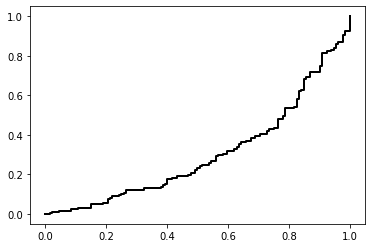

Random Data, horizon 60
AUC good =  0.5


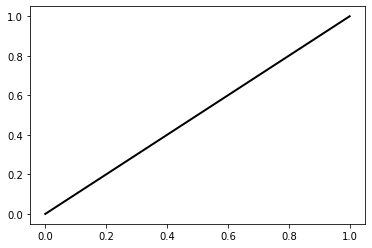

C =  0.001
Real_data_accuracy   :  0.5502
Random data_accuracy :  0.5728
Gain =  -0.0226
---------------------------------------------

Real Data & Random Data Processing for horizon =  120
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 10s 14ms/step
Epoch 1/1
718/718 [==============================] - 0s 157us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 10s 14ms/step
Epoch 1/1
718/718 [==============================] - 0s 127us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 10s 14ms/step
Epoch 1/1
718/718 [==============================] - 0s 130us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 10s 14ms/step
Epoch 1/1
718/718 [==============================] - 0s 128us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 10s 14ms/step
Epoch 1/1
718/718 [==============================] - 0s 135us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 10

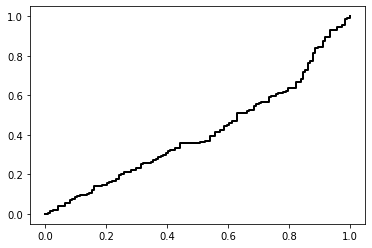

Random Data, horizon 120
AUC good =  0.5


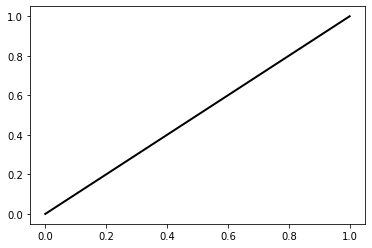

C =  1000.0
Real_data_accuracy   :  0.5793
Random data_accuracy :  0.5987
Gain =  -0.0194
---------------------------------------------

Real Data & Random Data Processing for horizon =  250
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 10s 14ms/step
Epoch 1/1
718/718 [==============================] - 0s 143us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 10s 14ms/step
Epoch 1/1
718/718 [==============================] - 0s 134us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 10s 14ms/step
Epoch 1/1
718/718 [==============================] - 0s 156us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 10s 14ms/step
Epoch 1/1
718/718 [==============================] - 0s 159us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 10s 14ms/step
Epoch 1/1
718/718 [==============================] - 0s 140us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 1

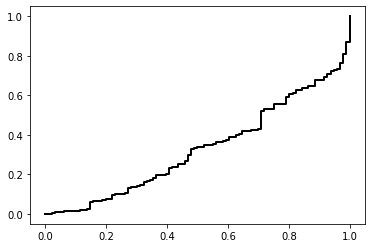

Random Data, horizon 250
AUC good =  0.5


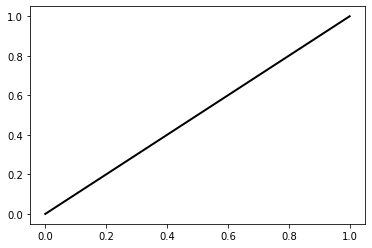

C =  10.0
Real_data_accuracy   :  0.5372
Random data_accuracy :  0.6893
Gain =  -0.1521
---------------------------------------------

LQD
Real Data & Random Data Processing for horizon =  1
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 11s 15ms/step
Epoch 1/1
718/718 [==============================] - 0s 137us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 11s 15ms/step
Epoch 1/1
718/718 [==============================] - 0s 142us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 11s 15ms/step
Epoch 1/1
718/718 [==============================] - 0s 146us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 10s 15ms/step
Epoch 1/1
718/718 [==============================] - 0s 141us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 11s 15ms/step
Epoch 1/1
718/718 [==============================] - 0s 151us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 1

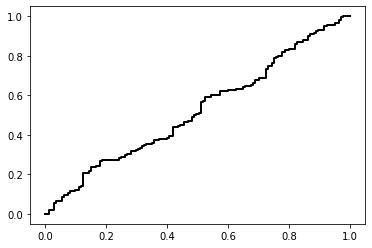

Random Data, horizon 1
AUC good =  0.5038477712363331


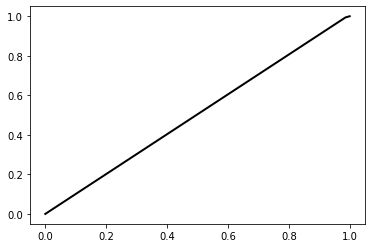

C =  1.0
Real_data_accuracy   :  0.5081
Random data_accuracy :  0.534
Gain =  -0.0259
---------------------------------------------

Real Data & Random Data Processing for horizon =  3
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 11s 15ms/step
Epoch 1/1
718/718 [==============================] - 0s 149us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 11s 15ms/step
Epoch 1/1
718/718 [==============================] - 0s 135us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 11s 15ms/step
Epoch 1/1
718/718 [==============================] - 0s 137us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 11s 16ms/step
Epoch 1/1
718/718 [==============================] - 0s 144us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 11s 15ms/step
Epoch 1/1
718/718 [==============================] - 0s 144us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 11s 15m

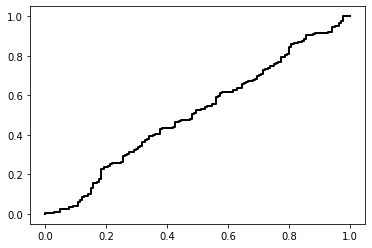

Random Data, horizon 3
AUC good =  0.5098784194528875


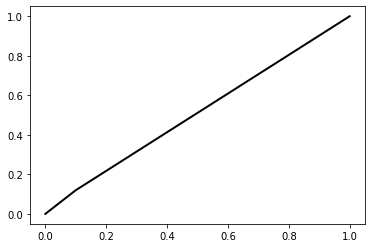

C =  1000.0
Real_data_accuracy   :  0.5146
Random data_accuracy :  0.4757
Gain =  0.0389
---------------------------------------------

Real Data & Random Data Processing for horizon =  5
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 11s 15ms/step
Epoch 1/1
718/718 [==============================] - 0s 143us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 11s 15ms/step
Epoch 1/1
718/718 [==============================] - 0s 162us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 11s 16ms/step
Epoch 1/1
718/718 [==============================] - 0s 143us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 11s 16ms/step
Epoch 1/1
718/718 [==============================] - 0s 139us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 11s 16ms/step
Epoch 1/1
718/718 [==============================] - 0s 153us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 11s 

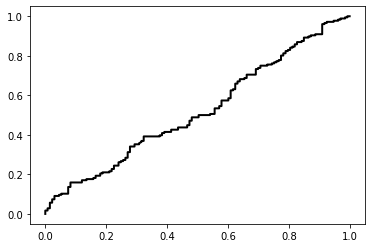

Random Data, horizon 5
AUC good =  0.5


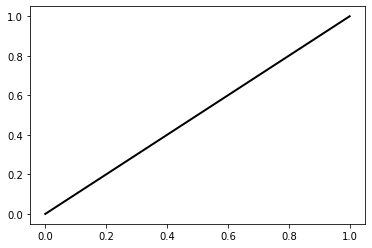

C =  0.01
Real_data_accuracy   :  0.5696
Random data_accuracy :  0.4304
Gain =  0.1392
---------------------------------------------

Real Data & Random Data Processing for horizon =  10
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 11s 16ms/step
Epoch 1/1
718/718 [==============================] - 0s 144us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 12s 16ms/step
Epoch 1/1
718/718 [==============================] - 0s 140us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 11s 16ms/step
Epoch 1/1
718/718 [==============================] - 0s 142us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 11s 16ms/step
Epoch 1/1
718/718 [==============================] - 0s 164us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 12s 16ms/step
Epoch 1/1
718/718 [==============================] - 0s 156us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 12s 1

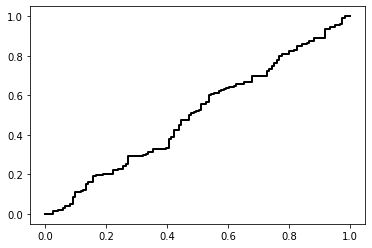

Random Data, horizon 10
AUC good =  0.5026595744680851


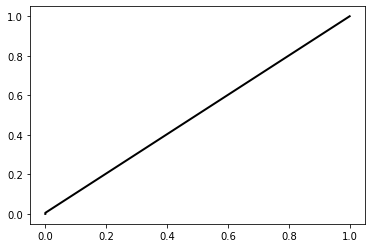

C =  1.0
Real_data_accuracy   :  0.5858
Random data_accuracy :  0.3948
Gain =  0.191
---------------------------------------------

Real Data & Random Data Processing for horizon =  20
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 12s 16ms/step
Epoch 1/1
718/718 [==============================] - 0s 151us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 12s 16ms/step
Epoch 1/1
718/718 [==============================] - 0s 149us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 12s 17ms/step
Epoch 1/1
718/718 [==============================] - 0s 159us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 12s 16ms/step
Epoch 1/1
718/718 [==============================] - 0s 149us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 12s 16ms/step
Epoch 1/1
718/718 [==============================] - 0s 167us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 12s 17m

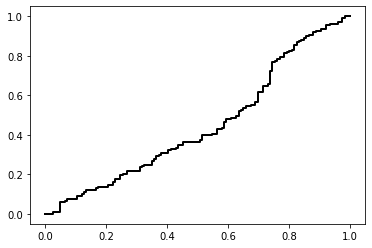

Random Data, horizon 20
AUC good =  0.51183970856102


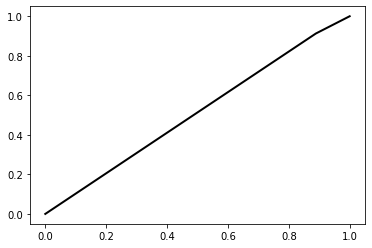

C =  100.0
Real_data_accuracy   :  0.5663
Random data_accuracy :  0.5858
Gain =  -0.0195
---------------------------------------------

Real Data & Random Data Processing for horizon =  40
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 12s 17ms/step
Epoch 1/1
718/718 [==============================] - 0s 148us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 12s 17ms/step
Epoch 1/1
718/718 [==============================] - 0s 148us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 12s 17ms/step
Epoch 1/1
718/718 [==============================] - 0s 155us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 12s 17ms/step
Epoch 1/1
718/718 [==============================] - 0s 151us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 12s 17ms/step
Epoch 1/1
718/718 [==============================] - 0s 153us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 12s

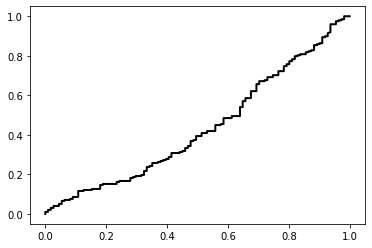

Random Data, horizon 40
AUC good =  0.5


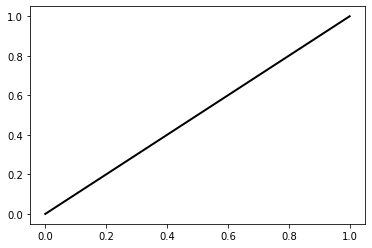

C =  10.0
Real_data_accuracy   :  0.6408
Random data_accuracy :  0.6408
Gain =  0.0
---------------------------------------------

Real Data & Random Data Processing for horizon =  60
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 12s 17ms/step
Epoch 1/1
718/718 [==============================] - 0s 166us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 12s 17ms/step
Epoch 1/1
718/718 [==============================] - 0s 158us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 12s 17ms/step
Epoch 1/1
718/718 [==============================] - 0s 155us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 12s 17ms/step
Epoch 1/1
718/718 [==============================] - 0s 162us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 12s 17ms/step
Epoch 1/1
718/718 [==============================] - 0s 202us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 12s 17ms

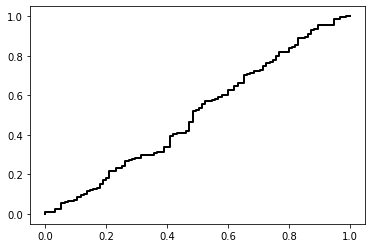

Random Data, horizon 60
AUC good =  0.5


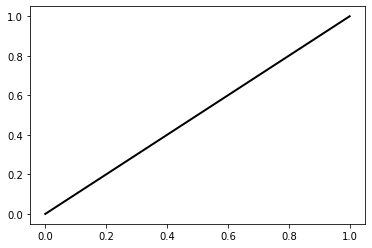

C =  10.0
Real_data_accuracy   :  0.589
Random data_accuracy :  0.3074
Gain =  0.2816
---------------------------------------------

Real Data & Random Data Processing for horizon =  120
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 12s 17ms/step
Epoch 1/1
718/718 [==============================] - 0s 154us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 13s 18ms/step
Epoch 1/1
718/718 [==============================] - 0s 161us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 13s 18ms/step
Epoch 1/1
718/718 [==============================] - 0s 162us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 12s 17ms/step
Epoch 1/1
718/718 [==============================] - 0s 157us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 13s 18ms/step
Epoch 1/1
718/718 [==============================] - 0s 156us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 13s 1

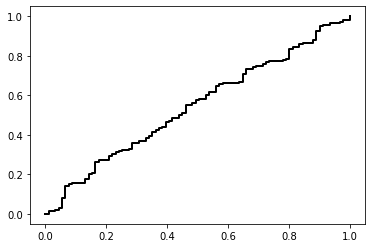

Random Data, horizon 120
AUC good =  0.5548694424841214


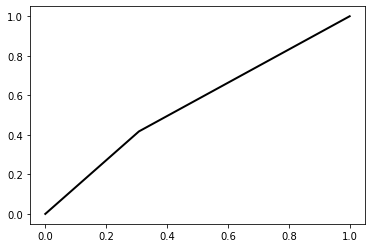

C =  1000.0
Real_data_accuracy   :  0.6181
Random data_accuracy :  0.4984
Gain =  0.1197
---------------------------------------------

Real Data & Random Data Processing for horizon =  250
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 13s 18ms/step
Epoch 1/1
718/718 [==============================] - 0s 161us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 13s 18ms/step
Epoch 1/1
718/718 [==============================] - 0s 159us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 13s 18ms/step
Epoch 1/1
718/718 [==============================] - 0s 170us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 13s 18ms/step
Epoch 1/1
718/718 [==============================] - 0s 179us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 13s 18ms/step
Epoch 1/1
718/718 [==============================] - 0s 174us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 13

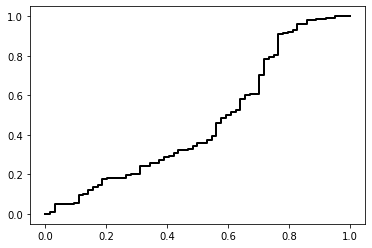

Random Data, horizon 250
AUC good =  0.5


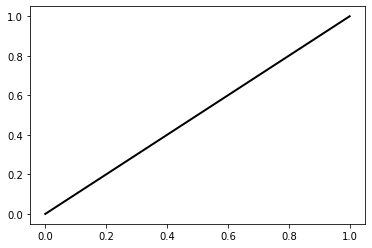

C =  10.0
Real_data_accuracy   :  0.6828
Random data_accuracy :  0.2071
Gain =  0.4757
---------------------------------------------

TIP
Real Data & Random Data Processing for horizon =  1
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 13s 18ms/step
Epoch 1/1
718/718 [==============================] - 0s 158us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 13s 18ms/step
Epoch 1/1
718/718 [==============================] - 0s 165us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 13s 18ms/step
Epoch 1/1
718/718 [==============================] - 0s 164us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 13s 18ms/step
Epoch 1/1
718/718 [==============================] - 0s 164us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 14s 19ms/step
Epoch 1/1
718/718 [==============================] - 0s 164us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 13

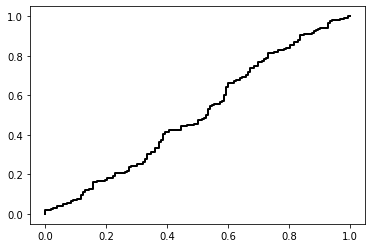

Random Data, horizon 1
AUC good =  0.5


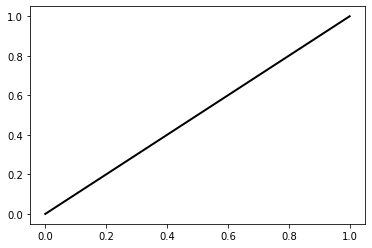

C =  0.1
Real_data_accuracy   :  0.4693
Random data_accuracy :  0.5049
Gain =  -0.0356
---------------------------------------------

Real Data & Random Data Processing for horizon =  3
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 14s 19ms/step
Epoch 1/1
718/718 [==============================] - 0s 187us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 13s 19ms/step
Epoch 1/1
718/718 [==============================] - 0s 172us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 13s 19ms/step
Epoch 1/1
718/718 [==============================] - 0s 159us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 14s 19ms/step
Epoch 1/1
718/718 [==============================] - 0s 169us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 13s 19ms/step
Epoch 1/1
718/718 [==============================] - 0s 184us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 14s 19

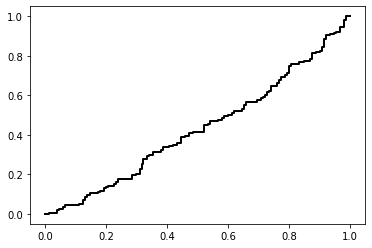

Random Data, horizon 3
AUC good =  0.5


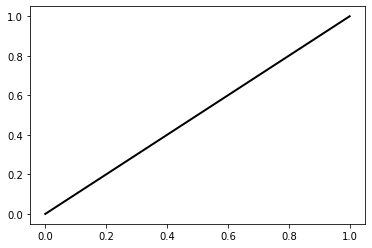

C =  10.0
Real_data_accuracy   :  0.466
Random data_accuracy :  0.4984
Gain =  -0.0324
---------------------------------------------

Real Data & Random Data Processing for horizon =  5
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 14s 19ms/step
Epoch 1/1
718/718 [==============================] - 0s 179us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 14s 19ms/step
Epoch 1/1
718/718 [==============================] - 0s 176us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 14s 19ms/step
Epoch 1/1
718/718 [==============================] - 0s 181us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 14s 19ms/step
Epoch 1/1
718/718 [==============================] - 0s 183us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 14s 19ms/step
Epoch 1/1
718/718 [==============================] - 0s 182us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 14s 20

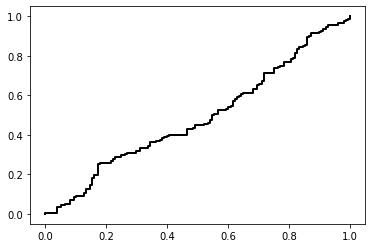

Random Data, horizon 5
AUC good =  0.5


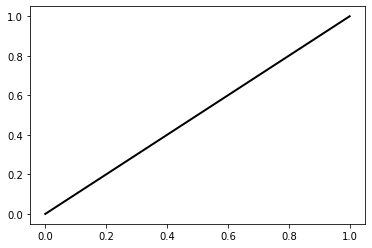

C =  1000.0
Real_data_accuracy   :  0.466
Random data_accuracy :  0.4919
Gain =  -0.0259
---------------------------------------------

Real Data & Random Data Processing for horizon =  10
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 14s 20ms/step
Epoch 1/1
718/718 [==============================] - 0s 171us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 14s 20ms/step
Epoch 1/1
718/718 [==============================] - 0s 181us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 14s 20ms/step
Epoch 1/1
718/718 [==============================] - 0s 177us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 14s 20ms/step
Epoch 1/1
718/718 [==============================] - 0s 179us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 14s 20ms/step
Epoch 1/1
718/718 [==============================] - 0s 187us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 14s

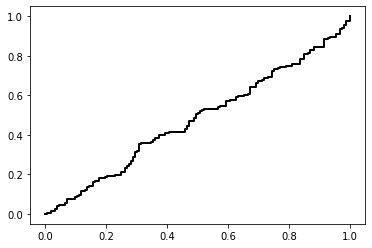

Random Data, horizon 10
AUC good =  0.5


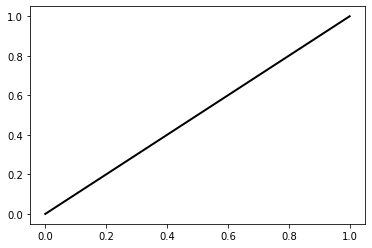

C =  100.0
Real_data_accuracy   :  0.4854
Random data_accuracy :  0.5049
Gain =  -0.0195
---------------------------------------------

Real Data & Random Data Processing for horizon =  20
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 14s 20ms/step
Epoch 1/1
718/718 [==============================] - 0s 181us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 14s 20ms/step
Epoch 1/1
718/718 [==============================] - 0s 177us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 15s 20ms/step
Epoch 1/1
718/718 [==============================] - 0s 191us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 15s 20ms/step
Epoch 1/1
718/718 [==============================] - 0s 186us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 15s 21ms/step
Epoch 1/1
718/718 [==============================] - 0s 184us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 15s

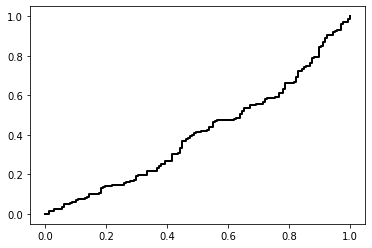

Random Data, horizon 20
AUC good =  0.5


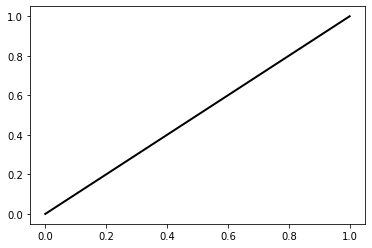

C =  0.0001
Real_data_accuracy   :  0.4531
Random data_accuracy :  0.5243
Gain =  -0.0712
---------------------------------------------

Real Data & Random Data Processing for horizon =  40
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 15s 20ms/step
Epoch 1/1
718/718 [==============================] - 0s 181us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 14s 20ms/step
Epoch 1/1
718/718 [==============================] - 0s 180us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 15s 21ms/step
Epoch 1/1
718/718 [==============================] - 0s 202us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 15s 20ms/step
Epoch 1/1
718/718 [==============================] - 0s 186us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 15s 21ms/step
Epoch 1/1
718/718 [==============================] - 0s 182us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 15

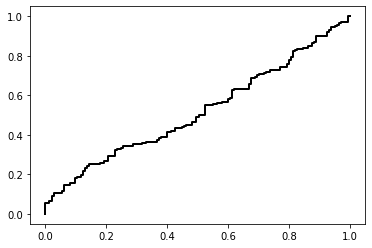

Random Data, horizon 40
AUC good =  0.5


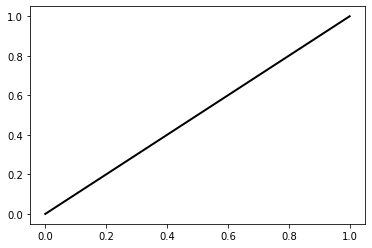

C =  0.001
Real_data_accuracy   :  0.521
Random data_accuracy :  0.4693
Gain =  0.0517
---------------------------------------------

Real Data & Random Data Processing for horizon =  60
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 15s 21ms/step
Epoch 1/1
718/718 [==============================] - 0s 179us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 15s 21ms/step
Epoch 1/1
718/718 [==============================] - 0s 195us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 15s 21ms/step
Epoch 1/1
718/718 [==============================] - 0s 191us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 15s 21ms/step
Epoch 1/1
718/718 [==============================] - 0s 193us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 15s 21ms/step
Epoch 1/1
718/718 [==============================] - 0s 189us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 15s 2

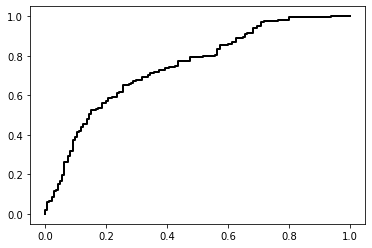

Random Data, horizon 60
AUC good =  0.551829268292683


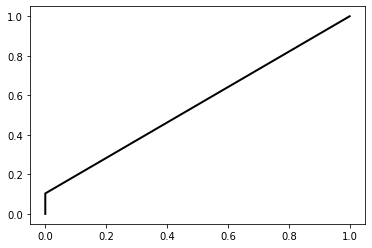

C =  0.01
Real_data_accuracy   :  0.6861
Random data_accuracy :  0.5243
Gain =  0.1618
---------------------------------------------

Real Data & Random Data Processing for horizon =  120
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 15s 21ms/step
Epoch 1/1
718/718 [==============================] - 0s 211us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 15s 21ms/step
Epoch 1/1
718/718 [==============================] - 0s 198us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 15s 21ms/step
Epoch 1/1
718/718 [==============================] - 0s 192us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 16s 22ms/step
Epoch 1/1
718/718 [==============================] - 0s 206us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 16s 22ms/step
Epoch 1/1
718/718 [==============================] - 0s 237us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 16s 

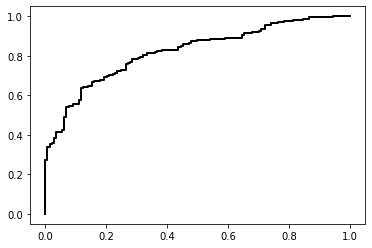

Random Data, horizon 120
AUC good =  0.5


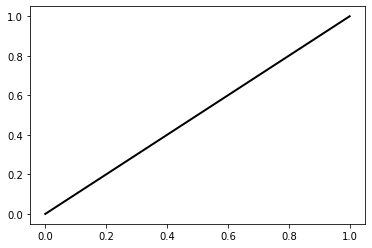

C =  0.01
Real_data_accuracy   :  0.7087
Random data_accuracy :  0.466
Gain =  0.2427
---------------------------------------------

Real Data & Random Data Processing for horizon =  250
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 16s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 208us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 16s 22ms/step
Epoch 1/1
718/718 [==============================] - 0s 197us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 16s 22ms/step
Epoch 1/1
718/718 [==============================] - 0s 196us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 16s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 235us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 16s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 220us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 16s 2

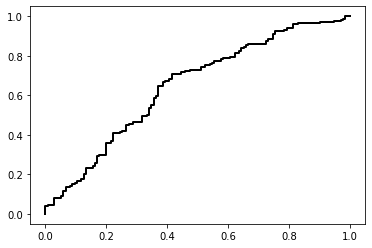

Random Data, horizon 250
AUC good =  0.5


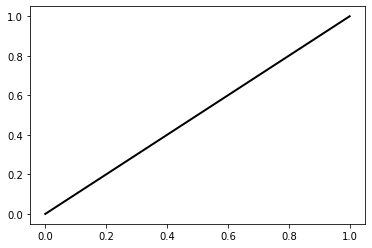

C =  0.01
Real_data_accuracy   :  0.5793
Random data_accuracy :  0.5631
Gain =  0.0162
---------------------------------------------

IYR
Real Data & Random Data Processing for horizon =  1
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 16s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 203us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 16s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 209us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 16s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 237us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 16s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 223us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 17s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 213us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 17

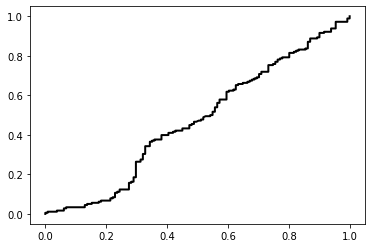

Random Data, horizon 1
AUC good =  0.48797066643794496


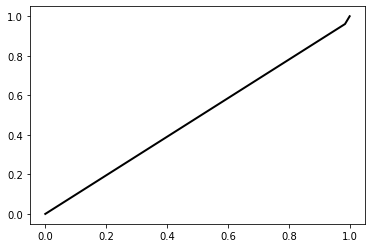

C =  0.01
Real_data_accuracy   :  0.5307
Random data_accuracy :  0.5599
Gain =  -0.0292
---------------------------------------------

Real Data & Random Data Processing for horizon =  3
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 17s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 224us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 17s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 214us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 17s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 241us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 17s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 208us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 17s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 215us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 17s 2

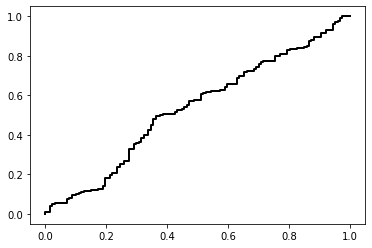

Random Data, horizon 3
AUC good =  0.5


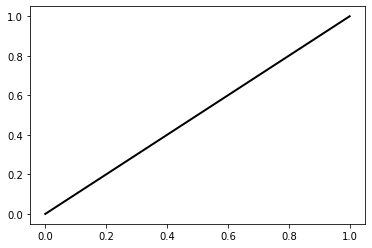

C =  10.0
Real_data_accuracy   :  0.5469
Random data_accuracy :  0.411
Gain =  0.1359
---------------------------------------------

Real Data & Random Data Processing for horizon =  5
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 218us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 247us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 218us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 231us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 209us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 17s 23m

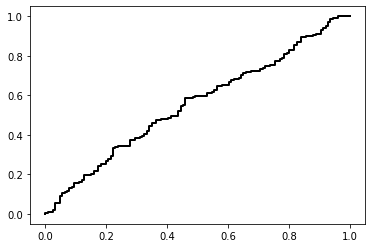

Random Data, horizon 5
AUC good =  0.5


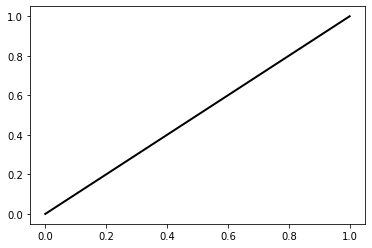

C =  1.0
Real_data_accuracy   :  0.5566
Random data_accuracy :  0.4078
Gain =  0.1488
---------------------------------------------

Real Data & Random Data Processing for horizon =  10
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 217us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 211us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 215us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 17s 23ms/step
Epoch 1/1
718/718 [==============================] - 0s 208us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 212us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 17s 24

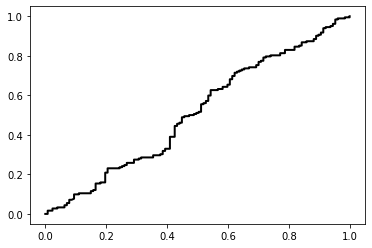

Random Data, horizon 10
AUC good =  0.5039370078740157


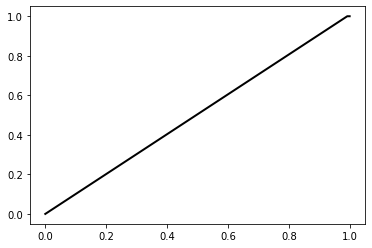

C =  0.001
Real_data_accuracy   :  0.5987
Random data_accuracy :  0.5922
Gain =  0.0065
---------------------------------------------

Real Data & Random Data Processing for horizon =  20
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 211us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 202us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 202us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 217us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 207us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 18s 

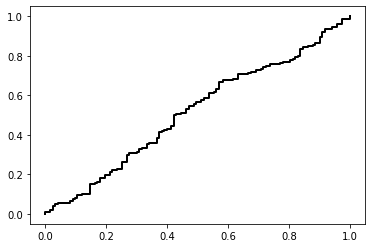

Random Data, horizon 20
AUC good =  0.5


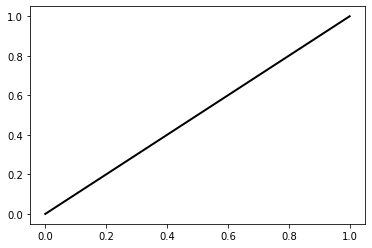

C =  1.0
Real_data_accuracy   :  0.5566
Random data_accuracy :  0.6019
Gain =  -0.0453
---------------------------------------------

Real Data & Random Data Processing for horizon =  40
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 213us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 211us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 18s 25ms/step
Epoch 1/1
718/718 [==============================] - 0s 215us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 18s 25ms/step
Epoch 1/1
718/718 [==============================] - 0s 253us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 17s 24ms/step
Epoch 1/1
718/718 [==============================] - 0s 213us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 18s 2

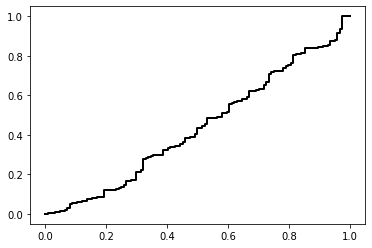

Random Data, horizon 40
AUC good =  0.48705318221447247


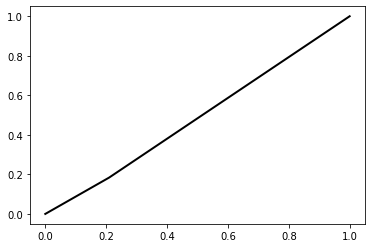

C =  100.0
Real_data_accuracy   :  0.5081
Random data_accuracy :  0.4272
Gain =  0.0809
---------------------------------------------

Real Data & Random Data Processing for horizon =  60
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 18s 25ms/step
Epoch 1/1
718/718 [==============================] - 0s 212us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 18s 25ms/step
Epoch 1/1
718/718 [==============================] - 0s 216us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 18s 25ms/step
Epoch 1/1
718/718 [==============================] - 0s 215us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 18s 25ms/step
Epoch 1/1
718/718 [==============================] - 0s 217us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 18s 25ms/step
Epoch 1/1
718/718 [==============================] - 0s 211us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 18s 

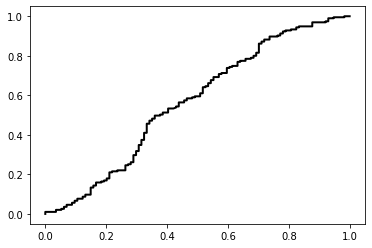

Random Data, horizon 60
AUC good =  0.3829959514170041


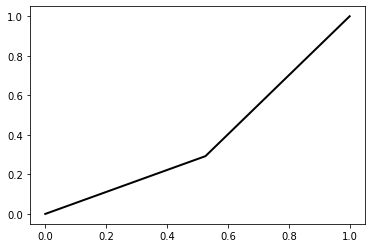

C =  100.0
Real_data_accuracy   :  0.6537
Random data_accuracy :  0.3592
Gain =  0.2945
---------------------------------------------

Real Data & Random Data Processing for horizon =  120
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 18s 25ms/step
Epoch 1/1
718/718 [==============================] - 0s 218us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 18s 25ms/step
Epoch 1/1
718/718 [==============================] - 0s 247us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 18s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 241us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 18s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 226us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 18s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 229us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 18s

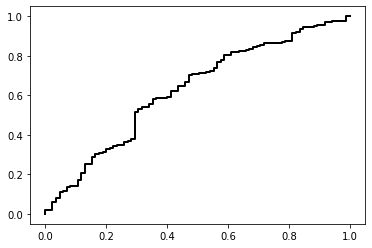

Random Data, horizon 120
AUC good =  0.5


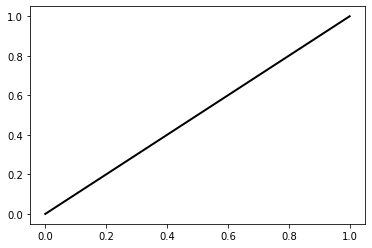

C =  0.01
Real_data_accuracy   :  0.7282
Random data_accuracy :  0.7249
Gain =  0.0033
---------------------------------------------

Real Data & Random Data Processing for horizon =  250
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 18s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 231us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 19s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 221us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 18s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 222us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 18s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 230us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 19s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 227us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 18s 

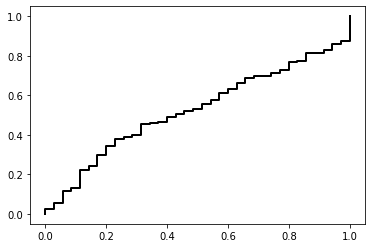

Random Data, horizon 250
AUC good =  0.6104275286757039


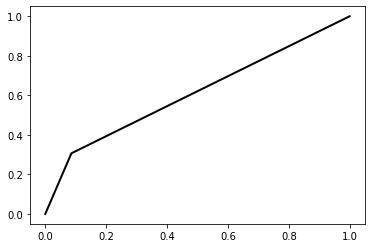

C =  1000.0
Real_data_accuracy   :  0.7055
Random data_accuracy :  0.3754
Gain =  0.3301
---------------------------------------------

GLD
Real Data & Random Data Processing for horizon =  1
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 19s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 217us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 19s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 218us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 19s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 213us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 19s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 220us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 19s 27ms/step
Epoch 1/1
718/718 [==============================] - 0s 219us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 

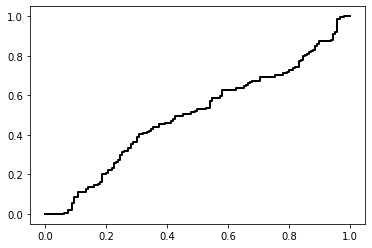

Random Data, horizon 1
AUC good =  0.5


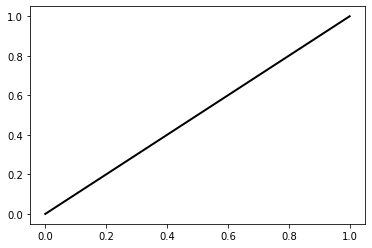

C =  0.01
Real_data_accuracy   :  0.5081
Random data_accuracy :  0.5146
Gain =  -0.0065
---------------------------------------------

Real Data & Random Data Processing for horizon =  3
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 19s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 226us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 19s 26ms/step
Epoch 1/1
718/718 [==============================] - 0s 226us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 19s 27ms/step
Epoch 1/1
718/718 [==============================] - 0s 246us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 19s 27ms/step
Epoch 1/1
718/718 [==============================] - 0s 233us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 19s 27ms/step
Epoch 1/1
718/718 [==============================] - 0s 228us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 19s 2

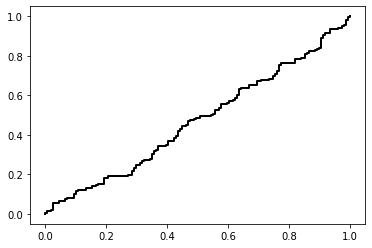

Random Data, horizon 3
AUC good =  0.47514460558303295


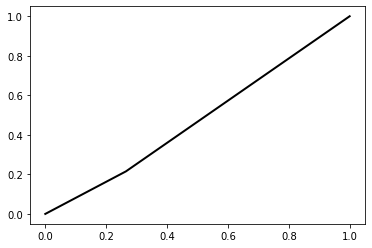

C =  0.001
Real_data_accuracy   :  0.4951
Random data_accuracy :  0.4693
Gain =  0.0258
---------------------------------------------

Real Data & Random Data Processing for horizon =  5
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 20s 27ms/step
Epoch 1/1
718/718 [==============================] - 0s 223us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 19s 27ms/step
Epoch 1/1
718/718 [==============================] - 0s 231us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 20s 27ms/step
Epoch 1/1
718/718 [==============================] - 0s 222us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 19s 27ms/step
Epoch 1/1
718/718 [==============================] - 0s 234us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 20s 27ms/step
Epoch 1/1
718/718 [==============================] - 0s 224us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 19s 2

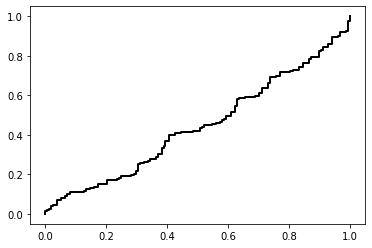

Random Data, horizon 5
AUC good =  0.4966686221924238


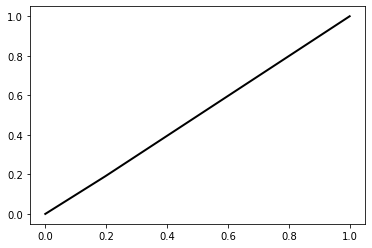

C =  0.0001
Real_data_accuracy   :  0.5113
Random data_accuracy :  0.5016
Gain =  0.0097
---------------------------------------------

Real Data & Random Data Processing for horizon =  10
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 20s 27ms/step
Epoch 1/1
718/718 [==============================] - 0s 232us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 20s 27ms/step
Epoch 1/1
718/718 [==============================] - 0s 245us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 20s 28ms/step
Epoch 1/1
718/718 [==============================] - 0s 231us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 20s 28ms/step
Epoch 1/1
718/718 [==============================] - 0s 237us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 20s 28ms/step
Epoch 1/1
718/718 [==============================] - 0s 229us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 20s

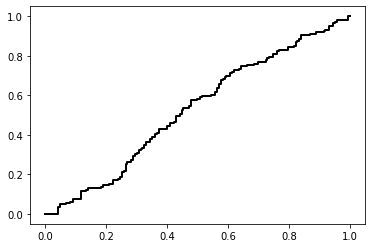

Random Data, horizon 10
AUC good =  0.4872048071266493


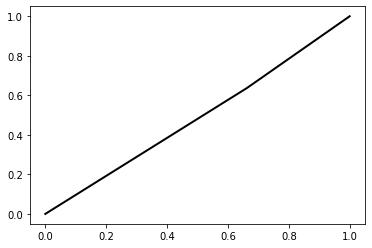

C =  10.0
Real_data_accuracy   :  0.4919
Random data_accuracy :  0.479
Gain =  0.0129
---------------------------------------------

Real Data & Random Data Processing for horizon =  20
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 20s 28ms/step
Epoch 1/1
718/718 [==============================] - 0s 238us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 20s 28ms/step
Epoch 1/1
718/718 [==============================] - 0s 233us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 20s 28ms/step
Epoch 1/1
718/718 [==============================] - 0s 236us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 20s 28ms/step
Epoch 1/1
718/718 [==============================] - 0s 250us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 20s 28ms/step
Epoch 1/1
718/718 [==============================] - 0s 267us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 20s 28

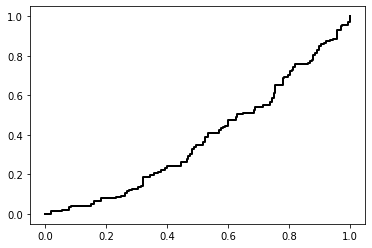

Random Data, horizon 20
AUC good =  0.5


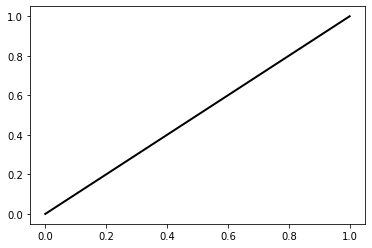

C =  0.0001
Real_data_accuracy   :  0.5178
Random data_accuracy :  0.5437
Gain =  -0.0259
---------------------------------------------

Real Data & Random Data Processing for horizon =  40
Alpha =  0.1
Epoch 1/1
718/718 [==============================] - 21s 29ms/step
Epoch 1/1
718/718 [==============================] - 0s 230us/step
Alpha =  1.0
Epoch 1/1
718/718 [==============================] - 20s 28ms/step
Epoch 1/1
718/718 [==============================] - 0s 229us/step
Alpha =  100.0
Epoch 1/1
718/718 [==============================] - 20s 28ms/step
Epoch 1/1
718/718 [==============================] - 0s 231us/step
Alpha =  1000.0
Epoch 1/1
718/718 [==============================] - 20s 28ms/step
Epoch 1/1
718/718 [==============================] - 0s 243us/step
Alpha =  10.0
Epoch 1/1
718/718 [==============================] - 21s 29ms/step
Epoch 1/1
718/718 [==============================] - 0s 237us/step
Alpha =  0.01
Epoch 1/1
718/718 [==============================] - 20

In [0]:
%%time


all_result = {}

for i in df_col:
    
    print(i)
    
    sub_result = {}
    
    for j in td:
        
        maxval = -10000.0
        c = 0.0
        sval = 0.0
                
        y_col = str(i)+"_"+str(j)+"_y"
        p_col = str(i)+"_p"
        v_col = str(i)+"_v"
                
        X = df.drop([y_col,p_col,v_col, "date","month","week","index"], axis = 1)
        y = df[y_col]
        
        r_X = r_df.drop([y_col,p_col,v_col,"date","month","week","index"], axis = 1)
        r_y = r_df[y_col]
                
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(r_X, r_y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        
        r_sc = StandardScaler()
        r_sc.fit(r_X_train)
        r_X_train_std = r_sc.transform(X_train)
        r_X_test_std = r_sc.transform(X_test)
        
        
        print("Real Data & Random Data Processing for horizon = ",j)
        
        
        real_model = Sequential()
        random_model = Sequential()  
        
  
        for reg in {0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0}:
            
                        
            # 2 hidden layers {100,100}
            print ("Alpha = ", reg)
            
            model = Sequential()
            model.add(Dense(100, input_dim=275, kernel_initializer='uniform',
                            kernel_regularizer=regularizers.l2(reg),
                            activation='relu'))
            model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
            model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
            sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=1.)
            model.compile(loss='mean_squared_error', optimizer=sgd, )
            
            nmodel = Sequential()
            nmodel.add(Dense(100, input_dim=275, kernel_initializer='uniform',
                             activation='relu', 
                             kernel_regularizer=regularizers.l2(reg)))
            nmodel.add(Dense(100, kernel_initializer='uniform', activation='relu'))
            nmodel.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
            sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=1.)
            nmodel.compile(loss='mean_squared_error', optimizer=sgd)
            
               
            model.fit(np.array(X_train_std), np.array(y_train), epochs=1,batch_size=100)
            real_eval = model.evaluate(np.array(X_train_std), np.array(y_train))
            
            nmodel.fit(np.array(r_X_train_std), np.array(y_train), epochs=1,batch_size=100)
            random_eval = model.evaluate(np.array(r_X_train_std), np.array(y_train))
            
            dfr = real_eval - random_eval
            sval = sval+dfr
            if maxval<dfr:
                maxval = dfr
                c = reg
                real_model = model
                random_model = nmodel
                
            
        predictions = real_model.predict(np.array(X_test_std))                        
        probs = real_model.predict_proba(X_test_std)
        
        
        print("Real Data, horizon",j)        


        fpr, tpr, thresholds = roc_curve(y_test, probs)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("AUC good = ",roc_auc)        
        plt.plot(fpr, tpr, lw=lw, color='black')
        #plt.title("Horizon = "+str(filename))
        plt.show()


        print("Random Data, horizon",j)

        r_predictions = random_model.predict(np.array(r_X_test_std))            
        r_probs = random_model.predict_proba(r_X_test_std)

        fpr, tpr, thresholds = roc_curve(y_test, r_probs)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("AUC good = ",roc_auc)        
        plt.plot(fpr, tpr, lw=lw, color='black')
        #plt.title("Horizon = "+str(filename))
        plt.show()

        for k in range(len(predictions)):
 
            if predictions[k] > 0.5:
                predictions[k] = 1
            else:
                predictions[k] = 0
                
                

        for l in range(len(r_predictions)):
    
            if r_predictions[l] > 0.5:
                r_predictions[l] = 1
            else:
                r_predictions[l] = 0

        print ("C = ",c)
        real_accuracy = round(metrics.accuracy_score(y_test, predictions),4)
        random_accuracy = round(metrics.accuracy_score(r_y_test, r_predictions),4)

        print("Real_data_accuracy   : ", real_accuracy)
        print("Random data_accuracy : ", random_accuracy)

        gain = (real_accuracy - random_accuracy)

        print ("Gain = ",round(gain,4))
        print ("---------------------------------------------\n")

        v_real_accuracy = str(j) + "_real_accuracy"
        v_random_accuracy = str(j) + "_random_accuracy"
        v_gain = str(j) +"_gain"

        sub_result[v_real_accuracy] = real_accuracy 
        sub_result[v_random_accuracy] = random_accuracy
        sub_result[v_gain] = gain

    all_result[i] = sub_result

In [0]:
final_results = pd.DataFrame(all_result)

In [0]:
final_results

In [0]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('gain')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()

In [0]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('real_accuracy')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()